# 金融风控—信用评分卡构建

# 一、数据介绍

## 项目背景

* Kaggle平台数据集，掌握信用评分卡的建模方法  
* 计算WOE值和IV值并据此完成特征筛选和特征变换  
* 训练LR模型，评估模型性能

## 数据说明

* ID  用户ID  
* SeriousDlqin2yrs  好坏客户  
* RevolvingUtilizationOfUnsecuredLines  可用额度比值  
* age  年龄  
* NumberOfTime30-59DaysPastDueNotWorse  逾期30-59天笔数  
* DebtRatio  负债率  
* MonthlyIncome  月收入  
* NumberOfOpenCreditLinesAndLoans  信贷数量  
* NumberOfTimes90DaysLate  逾期90天笔数  
* NumberRealEstateLoansOrLines  固定资产贷款量  
* NumberOfTime60-89DaysPastDueNotWorse  逾期60-89天笔数  
* NumberOfDependents  家属数量

# 二、分析概述

请在实验结束后，回答以下几个问题：  
* 可用额度比值越大，客户为坏客户的风险越大 ?  
* 信贷数量越大，客户为坏客户的风险越高 ?  
* 年龄越小，客户为坏客户的风险越高 ?

# 三、数据预处理

In [2]:
import numpy as np

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('cs-training.csv')
data.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,2.0,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,3.0,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,4.0,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150042 entries, 0 to 150041
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  float64
 1   SeriousDlqin2yrs                      150000 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  float64
 8   NumberOfTimes90DaysLate               150000 non-null  float64
 9   NumberRealEstateLoansOrLines          150000 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 11  

In [5]:
# 将英文的字段名转换为中文，方便后续分析
columns={'SeriousDlqin2yrs':'好坏客户',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值',
        'age':'年龄',
        'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
        'DebtRatio':'负债率',
        'MonthlyIncome':'月收入',
        'NumberOfOpenCreditLinesAndLoans':'信贷数量',
        'NumberOfTimes90DaysLate':'逾期90天笔数',
        'NumberRealEstateLoansOrLines':'固定资产贷款量',
        'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
        'NumberOfDependents':'家属数量'}
data.rename(columns=columns,inplace=True)

### 中文字显示的解决方案

In [6]:
#需要使用两种方法生成字体属性，用于后续不同场合
import matplotlib.font_manager as font_manager

SIMHEI = font_manager.FontManager().addfont('./SIMHEI.TTF') #引入外部的字体文件
font1 = font_manager.FontProperties(family=SIMHEI)  #第一种方法生成字体属性文件
font2 = font_manager.FontProperties(family='SIMHEI')#第二种方法生成字体属性文件

print("font1:")
print(font1)
print(font1.get_family())
print(font1.get_name())

print("font2:")
print(font2)
print(font2.get_family())
print(font2.get_name())
#打印的结果也不同,其中的玄机有待于进一步了解。

font1:
sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0
['sans-serif']
Arial
font2:
SIMHEI:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0
['SIMHEI']
SimHei


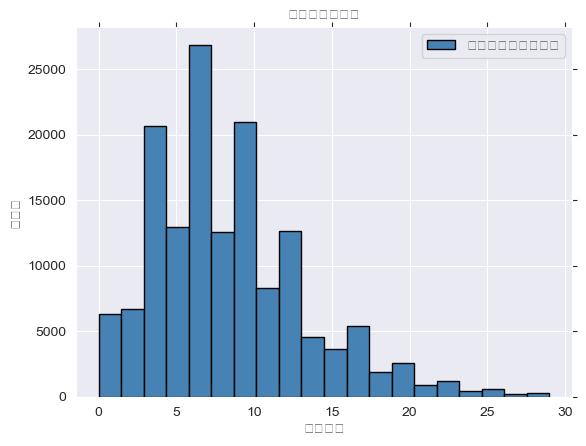

In [7]:
import matplotlib.pyplot as plt

# pyplot绘图用font1
plt.hist(data.loc[data['信贷数量']<30, '信贷数量'],
        bins = 20,
        color = 'steelblue',
        edgecolor = 'k',
        label = '客户信贷数量直方图' )

# 设置坐标轴标签和标题
plt.title('信贷数量直方图', fontproperties=font1)
plt.xlabel(xlabel='信贷数量', fontproperties=font1)
plt.ylabel(ylabel='客户数',fontproperties=font1)
plt.tick_params(top='off', right='off')

# 显示图例
plt.legend(loc = 'best',prop=font1)
# 显示图形
plt.show()

Text(0.5, 1.0, '信贷数量')

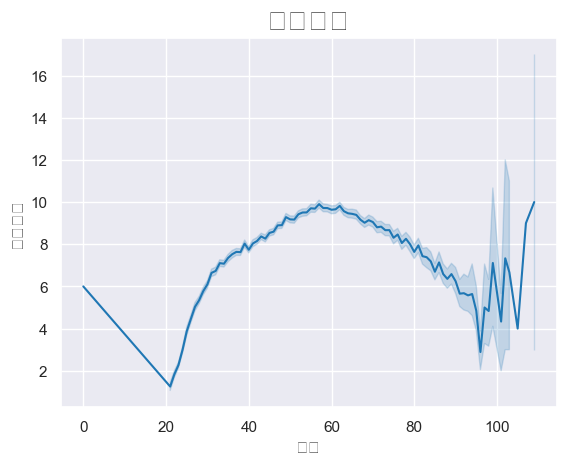

In [8]:
import seaborn as sns

# seaborn绘图用font2
sns.set_context("notebook", rc={"font.family": font2.get_family()})
sns.lineplot(x=data['年龄'], y=data['信贷数量'])
plt.title('信贷数量', {'fontsize':20 })

## 1、数据正确性检验

* ID列是否有重复值或是空值  
* 各个字段的取值是否和给定的取值范围一致  
* 数据中是否有重复值（完全相同的两行）

In [9]:
# 判断ID列是否有重复
data['ID'].nunique() == data.shape[0]

False

In [10]:
# ID列中存在重复值
is_duplicate = data.duplicated('ID')
duplicated_rows = data[is_duplicate]

In [11]:
duplicated_rows

,ID,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
42205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 观察数据发现，重复的数据都是ID为空的数据，删除这部分数据
data.dropna(subset=['ID'], inplace=True)

In [13]:
# 验证ID列是否有重复
data['ID'].nunique() == data.shape[0]

True

In [14]:
# 验证ID列是否有空值
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0 to 150041
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          150000 non-null  float64
 1   好坏客户        150000 non-null  float64
 2   可用额度比值      150000 non-null  float64
 3   年龄          150000 non-null  float64
 4   逾期30-59天笔数  150000 non-null  float64
 5   负债率         150000 non-null  float64
 6   月收入         120269 non-null  float64
 7   信贷数量        150000 non-null  float64
 8   逾期90天笔数     150000 non-null  float64
 9   固定资产贷款量     150000 non-null  float64
 10  逾期60-89天笔数  150000 non-null  float64
 11  家属数量        146076 non-null  float64
dtypes: float64(12)
memory usage: 14.9 MB


In [15]:
# 判断data中是否有重复值
data.duplicated().sum()

0

## 2、数据缺失值检验

* GBDT类的模型可以不考虑特征缺失，逻辑回归模型需要考虑对缺失值的处理  
* 暂时先不对缺失数据进行处理，后续建模时再行处理

In [16]:
# 统计数据缺失率
miss_rate = data.apply(lambda x:sum(x.isnull())/len(x),axis=0)

In [17]:
miss_rate

ID            0.000000
好坏客户          0.000000
可用额度比值        0.000000
年龄            0.000000
逾期30-59天笔数    0.000000
负债率           0.000000
月收入           0.198207
信贷数量          0.000000
逾期90天笔数       0.000000
固定资产贷款量       0.000000
逾期60-89天笔数    0.000000
家属数量          0.026160
dtype: float64

月收入、家属数量两个特征存在缺失值

In [18]:
# 月收入存在缺失值，使用均值进行填充
data=data.fillna({'月收入':data['月收入'].mean()})
# 家属数量的缺失值暂不处理

## 3、异常值检验

* GBDT类的模型对异常特征值比较不敏感，所以用其进行建模时可以不对异常值进行处理  
* 使用神经网络、逻辑回归等模型则需对异常值进行处理，过高的异常值在梯度下降时难以收敛  
* 异常值可以被当做缺失值处理，也可以采用分箱的方式消除异常值

In [19]:
data.describe()

,ID,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


三倍标准差法

In [20]:
print("使用三倍标准差法判断每个特征是否存在异常值")
for col in data.columns:
    min_flag, max_flag = 0, 0
    if((data[col].mean() - 3 * data[col].std()) > data[col].min()):
        min_flag = 1
    if((data[col].mean() + 3 * data[col].std()) < data[col].max()):
        max_flag = 1
    
    if (min_flag == 1 and max_flag == 1):
        print(f"{col}:存在两个方向的异常值")
    if (min_flag == 1 and max_flag == 0):
        print(f"{col}:存在min方向的异常值")
    if (min_flag == 0 and max_flag == 1):
        print(f"{col}:存在max方向的异常值")

使用三倍标准差法判断每个特征是否存在异常值
好坏客户:存在max方向的异常值
可用额度比值:存在max方向的异常值
年龄:存在两个方向的异常值
逾期30-59天笔数:存在max方向的异常值
负债率:存在max方向的异常值
月收入:存在max方向的异常值
信贷数量:存在max方向的异常值
逾期90天笔数:存在max方向的异常值
固定资产贷款量:存在max方向的异常值
逾期60-89天笔数:存在max方向的异常值
家属数量:存在max方向的异常值


箱线图法

Text(0.5, 0, "['年龄', '逾期30-59天笔数', '逾期90天笔数', '逾期60-89天笔数']")

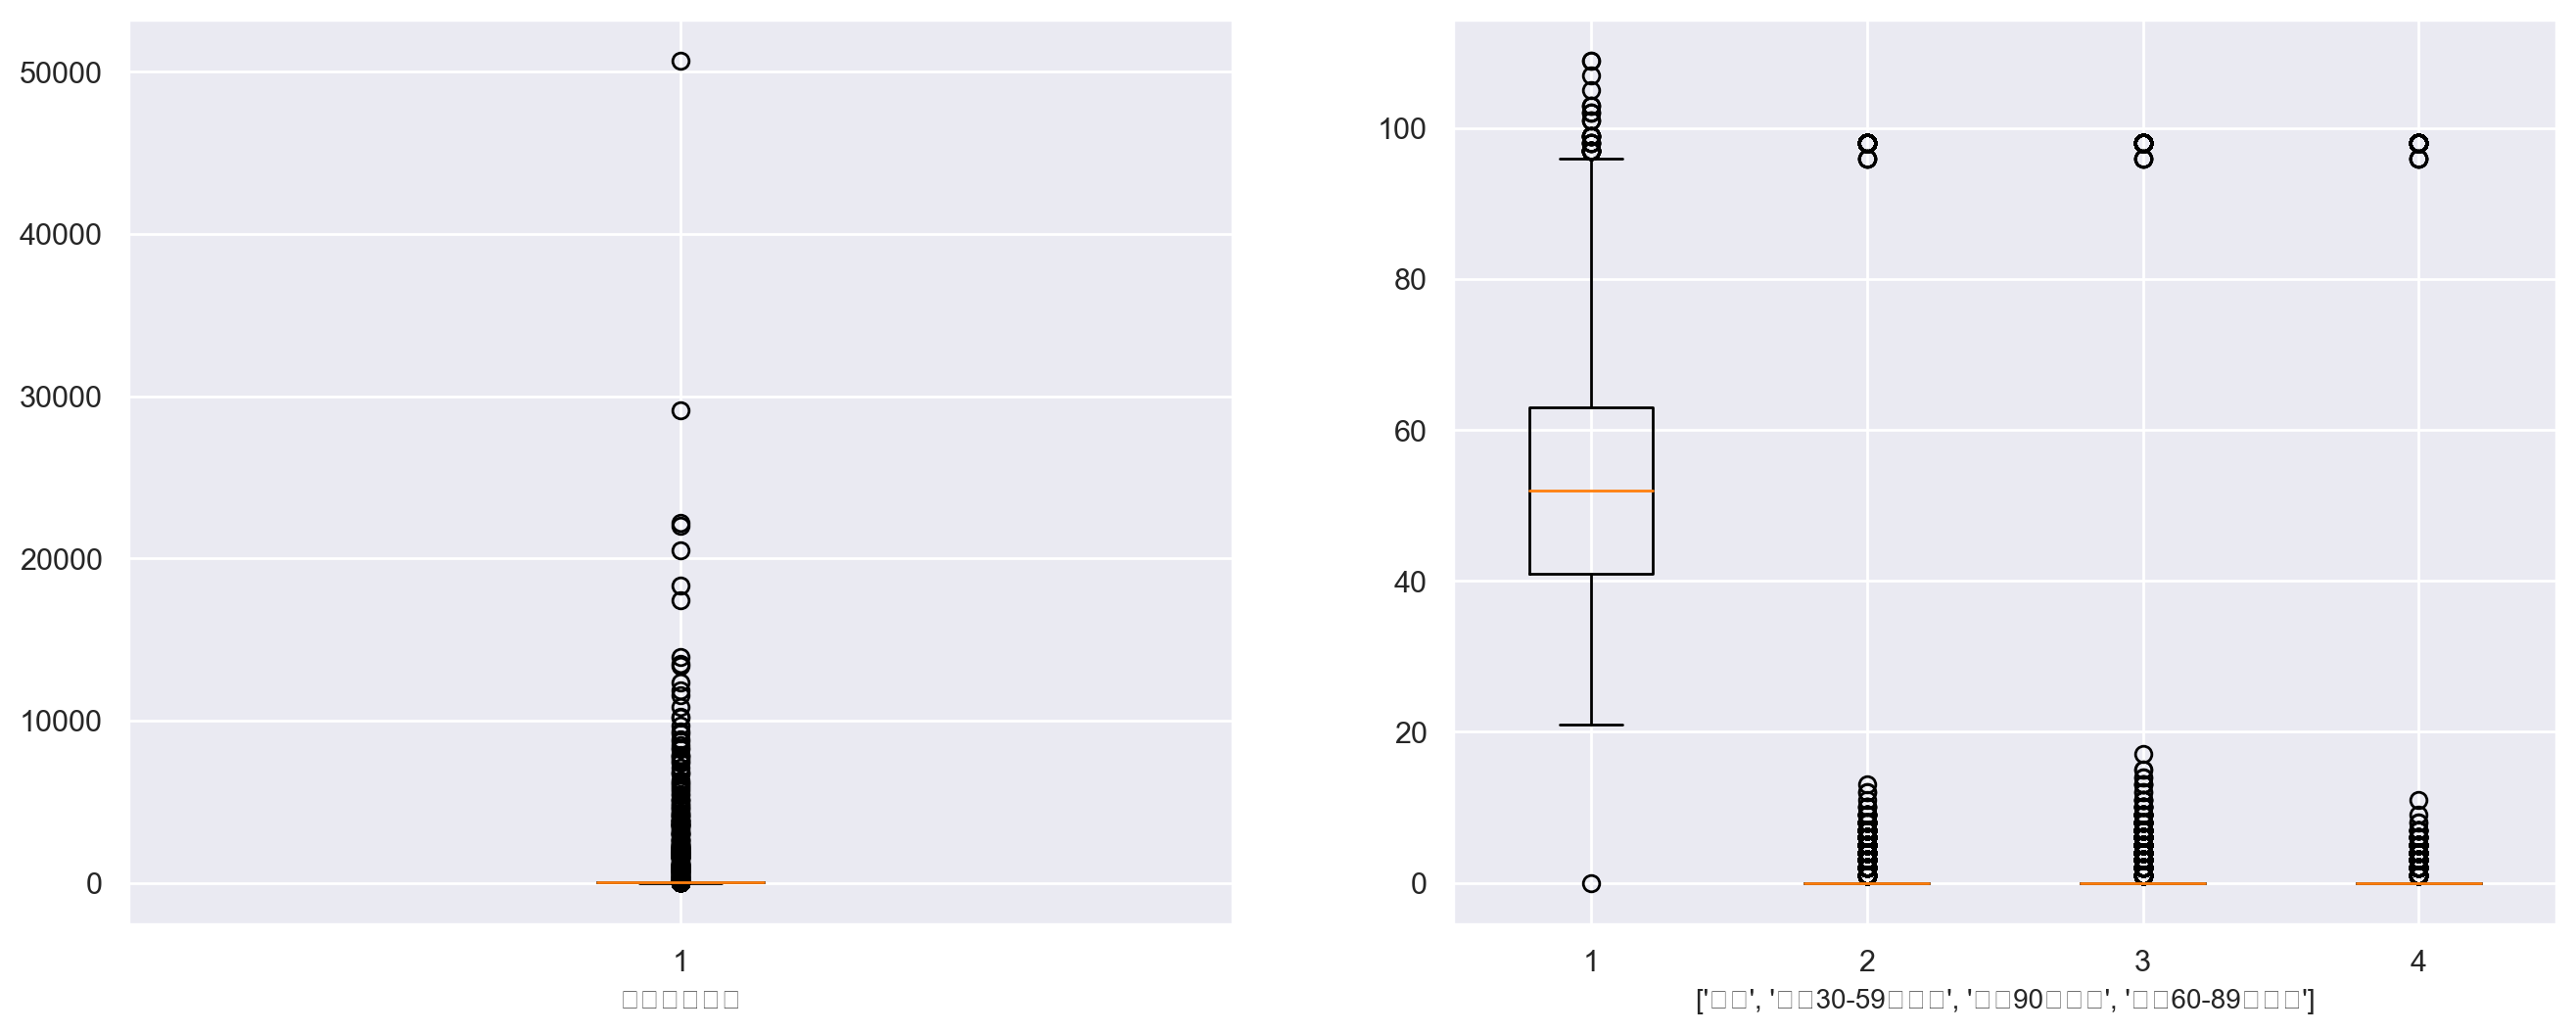

In [21]:
# 绘制箱线图

# 取值范围相似的特征放在一个图中绘制对应的箱线图
# [可用额度比值]
# [年龄,逾期30-59天笔数,逾期90天笔数,逾期60-89天笔数]
# [负债率,月收入]
# [信贷数量,固定资产贷款量]
# [家属数量]
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
plt.boxplot(data['可用额度比值'])
plt.xlabel('可用额度比值', fontproperties=font1)
plt.subplot(122)
plt.boxplot(data[['年龄','逾期30-59天笔数','逾期90天笔数','逾期60-89天笔数']])
plt.xlabel(['年龄','逾期30-59天笔数','逾期90天笔数','逾期60-89天笔数'], fontproperties=font1)

[Text(1, 0, '家属数量')]

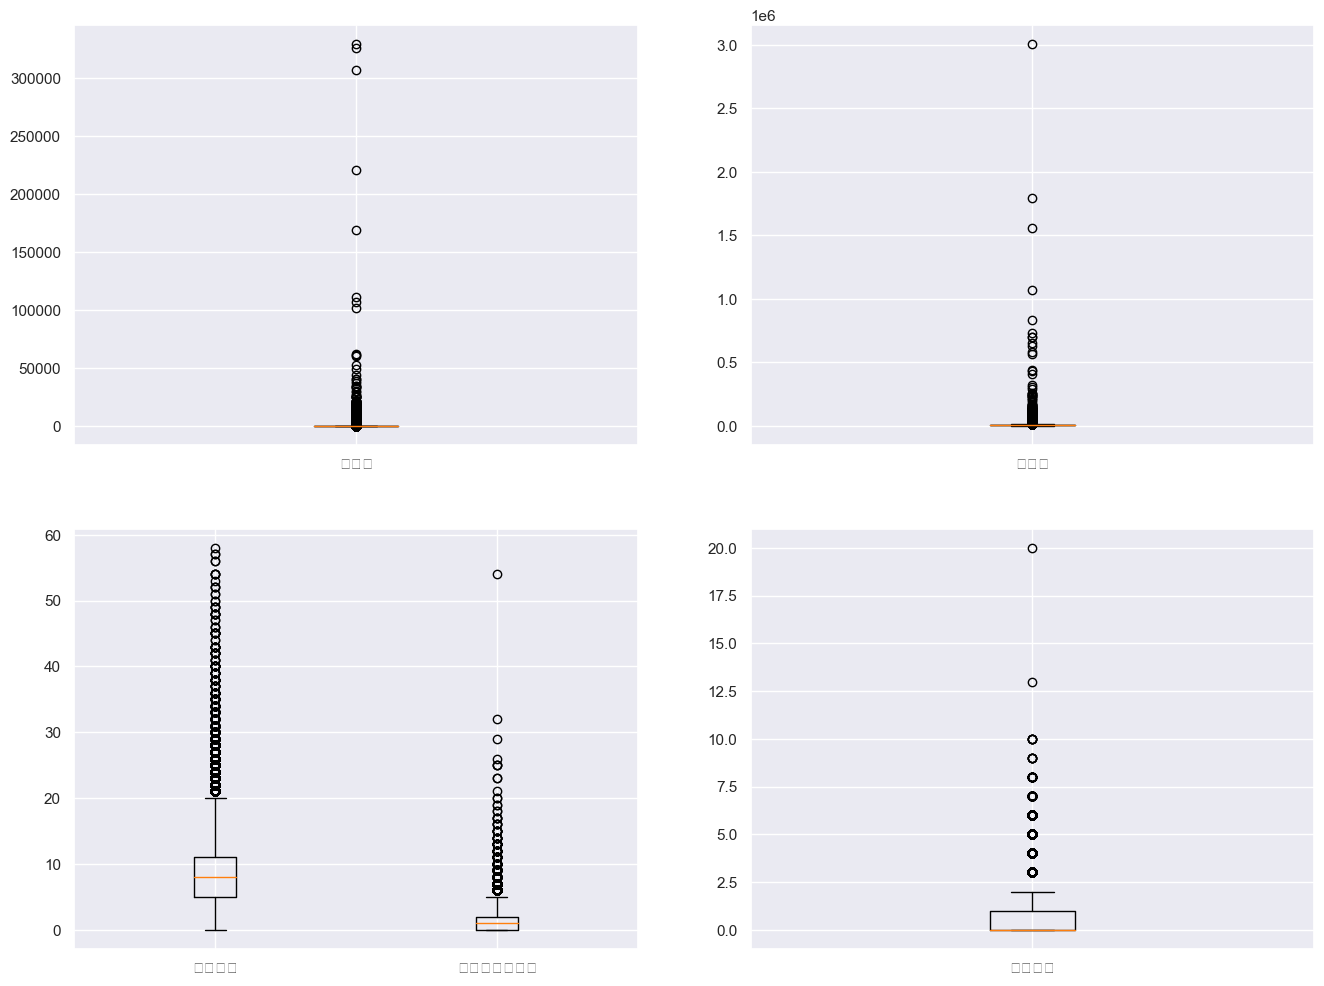

In [22]:
# [负债率,月收入]
# [信贷数量,固定资产贷款量]
# [家属数量]
f,ax = plt.subplots(2,2,figsize=(16,12))
ax[0,0].boxplot(data['负债率'])
ax[0,0].set_xticklabels(['负债率'])

ax[0,1].boxplot(data['月收入'].dropna())
ax[0,1].set_xticklabels(['月收入'])

ax[1,0].boxplot(data[['信贷数量', '固定资产贷款量']])
ax[1,0].set_xticklabels(['信贷数量', '固定资产贷款量'])

ax[1,1].boxplot(data['家属数量'].dropna())
ax[1,1].set_xticklabels(['家属数量'])

三倍标准差法假设数据符合正态分布，有可能出现三倍标准差法和箱线图法判断出来的异常值差异巨大的情况

In [23]:
# 业务角度剔除异常值
# 剔除年龄小于等于0 或 可用额度比值大于等于1的
data = data[data['年龄'] > 0]
data = data[data['可用额度比值'] < 1]

# 根据箱线图剔除偏差特别大的数据
# TODO
data = data[data['逾期30-59天笔数'] <20]
data = data[data['逾期90天笔数'] <20 ]
data = data[data['逾期60-89天笔数'] <20 ]
data = data[data['固定资产贷款量'] <40 ]
data = data[data['月收入'] < 2500000]
data.shape

(146390, 12)

In [24]:
# 月收入存在缺失值，使用均值进行填充
data=data.fillna({'月收入':data['月收入'].mean()})
# 家属数量的缺失值暂不处理

# 四、探索性分析

## 1、标签分布分析

In [25]:
# 1代表坏客户，0代表好客户
y = data['好坏客户']
print(f'Percentage of Bad:{round(y.value_counts(normalize=True)[1]*100,2)}%  --> ({y.value_counts()[1]}customer)')
print(f'Percentage of Good:{round(y.value_counts(normalize=True)[0]*100,2)}%  --> ({y.value_counts()[0]} customer)')

Percentage of Bad:5.9%  --> (8638customer)
Percentage of Good:94.1%  --> (137752 customer)


坏用户的比例约为6%，原始数据集是一个极度偏态的数据集

## 2、特征标签相关性分析

* 相关系数矩阵

In [26]:
# 去掉原始数据中ID列
data_temp = data.iloc[:,1:].copy()

# 计算相关系数矩阵
data_temp.corr()['好坏客户'].sort_values(ascending=False)

好坏客户          1.000000
逾期90天笔数       0.296942
逾期30-59天笔数    0.248694
逾期60-89天笔数    0.244550
可用额度比值        0.244513
家属数量          0.043657
固定资产贷款量       0.005730
负债率          -0.006114
信贷数量         -0.016127
月收入          -0.018009
年龄           -0.102942
Name: 好坏客户, dtype: float64

<Axes: >

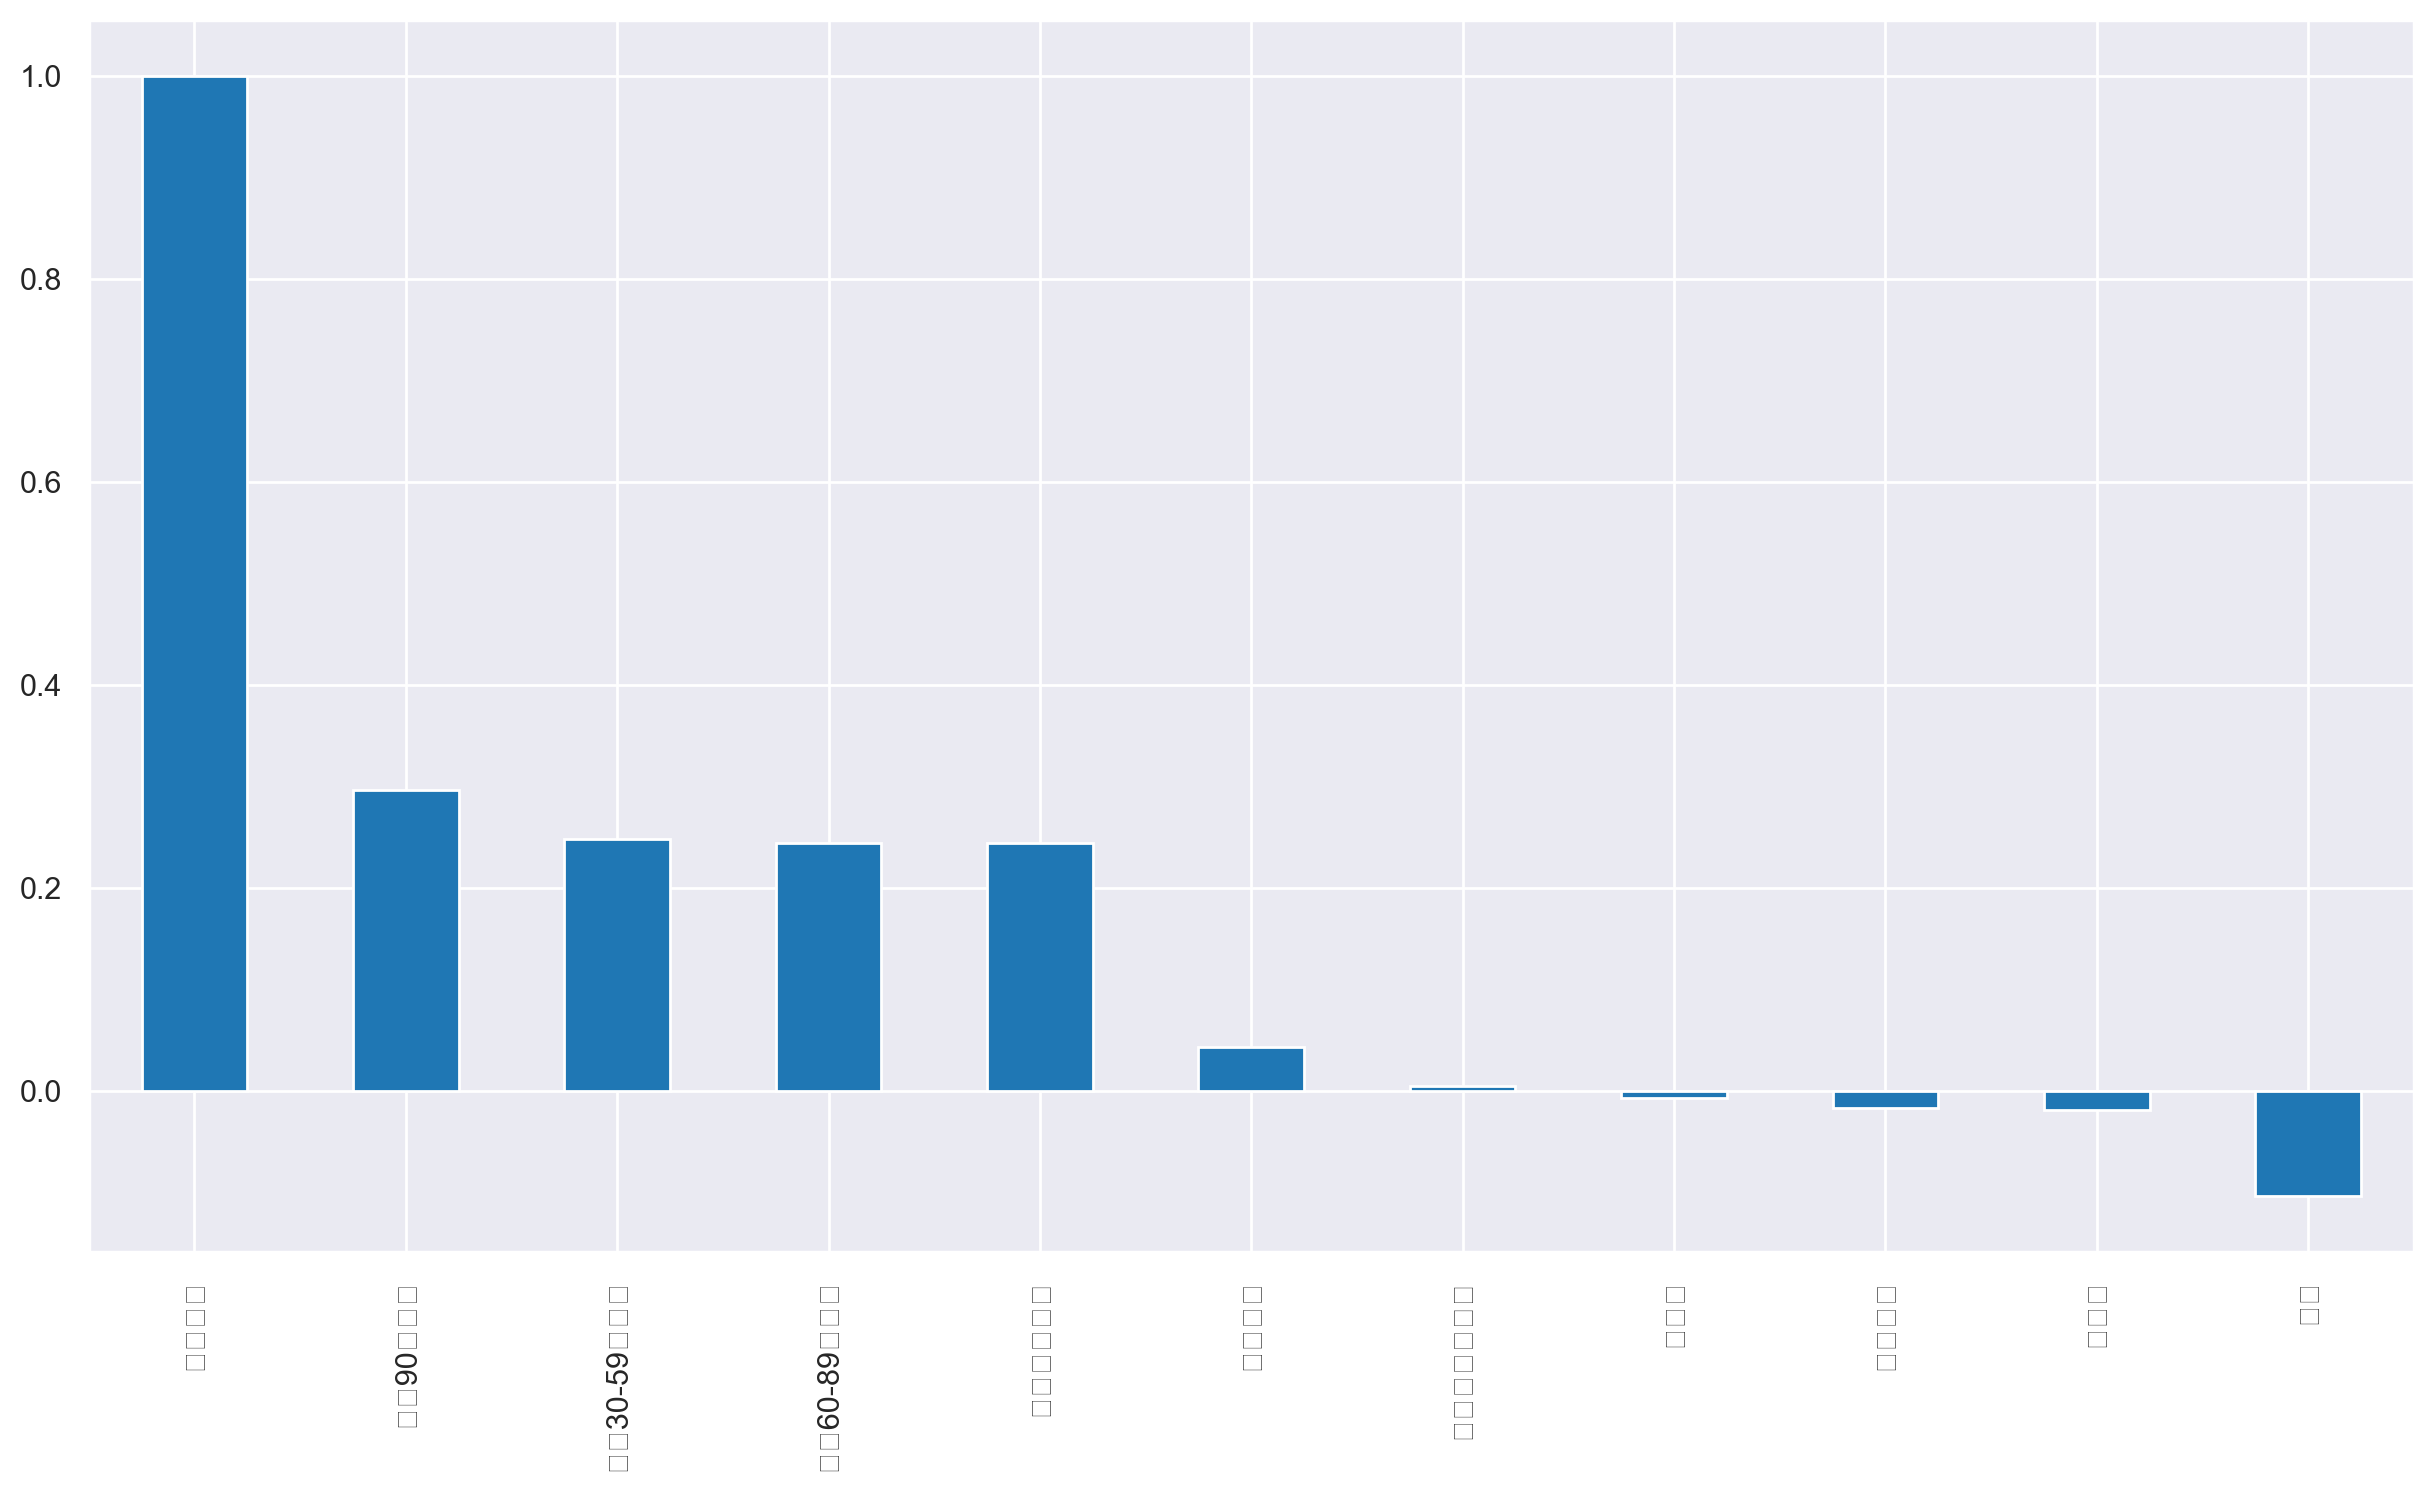

In [27]:
# 相关系数可视化展示
plt.figure(figsize=(15,8), dpi=200)
data_temp.corr()['好坏客户'].sort_values(ascending=False).plot(kind='bar')

* 特征和标签之间的相关性都不算高  
* 逾期90天笔数与标签的相关性最高，约为0.3，表示逾期90天笔数越大，用户越倾向于是坏用户

## 3、数据可视化探索

In [28]:
features=[x for x in data.columns if x not in ['ID','好坏客户']]

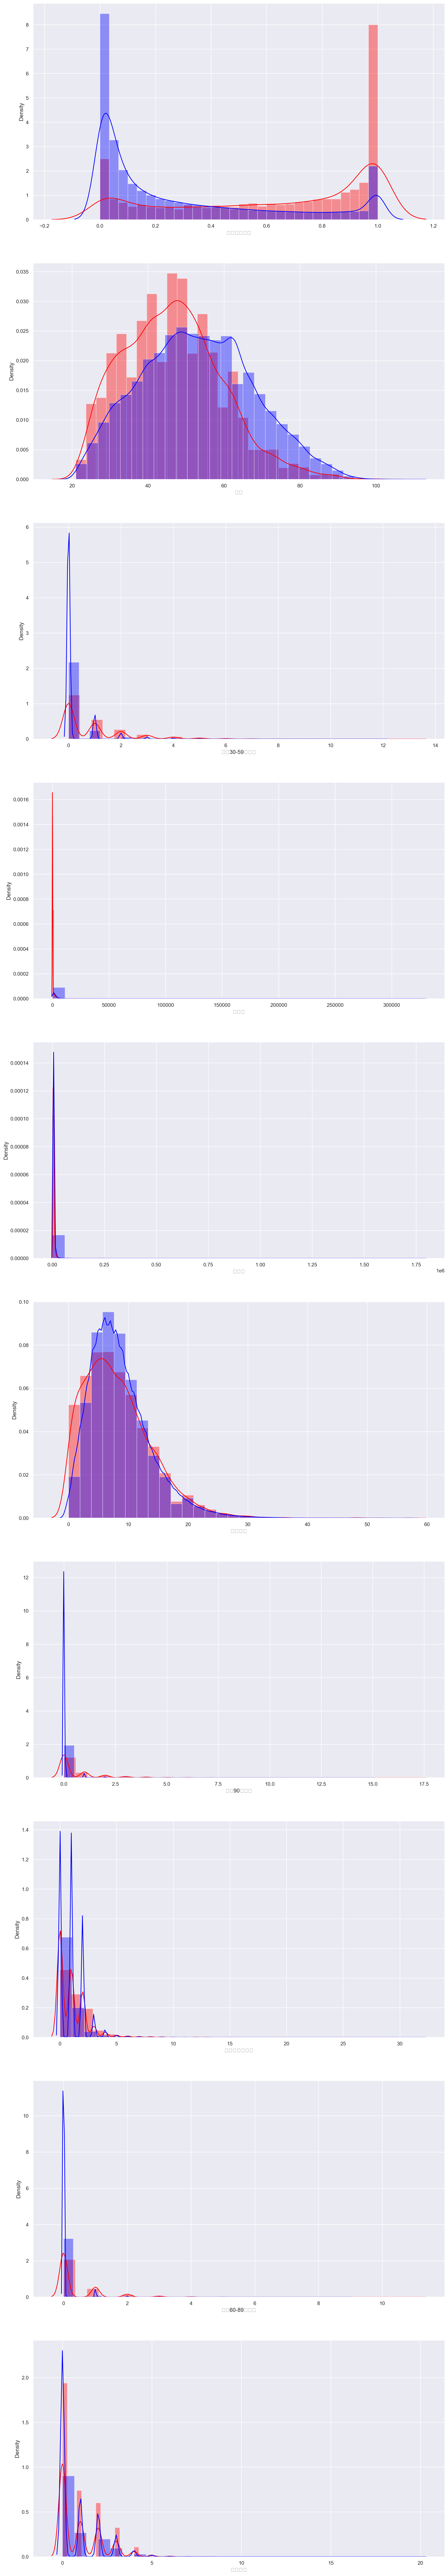

In [29]:
fig,axes=plt.subplots(nrows=10,ncols=1,figsize=(16,100), dpi=200)
for i, item in enumerate(features):
    plt.subplot(10,1,(i+1)) #子图标记从1开始
    ax = sns.distplot(a=data[item][data['好坏客户'] == 1],bins=30,color='red')
    ax = sns.distplot(a=data[item][data['好坏客户'] == 0],bins=30,color='blue')
#     ax.set_title(f'{item}')
# 红色表示坏客户，蓝色表示好客户

* 相比好客户，坏客户的可用额度比值较高  
* 相比好客户，坏客户的年龄要更小一点  
* 相比好客户，坏客户 逾期30-59笔数 逾期90天笔数 逾期60-89天笔数 要更大  
* 相比好客户，坏客户的负债率反而更低  
* 相比好客户，坏客户的月收入更低  
* 相比好客户，坏客户的信贷数量反而稍少

# 五、特征筛选

## 1、WOE值计算

* WOE，Weight of Evidence，对于离散型变量的某个值或者是连续变量的某个分段下的好坏客户的比例的对数。  
* 计算WOE编码首先需要对这个变量进行分组处理，一般采用均匀分箱，离散型变量组数一般是类别数量，连续型变量一般划分为6组，对于离散型变量，如果分箱太多，则进行分箱合并。  
* 分箱后的WOE需要同时在测试集和训练集满足单调性，若不满足，则需要重新进行分箱计算。

In [190]:
# 特征分组函数
# 判断特征中是否存在缺失值，存在的话，缺失值作为单独的一个组
def woe_cut(data, i):
    data_cut = pd.DataFrame()
    for item in data.columns:
        if(data[item].isnull().any()): # 存在缺失值
            series = pd.DataFrame(pd.qcut(data[item], i-1, labels=False, duplicates='drop'))
            series.fillna(i-1,inplace=True) # 缺失值自成一组
        else:
            series = pd.DataFrame(pd.qcut(data[item], i, labels=False, duplicates='drop'))
        data_cut = pd.concat([data_cut, series], axis=1)
    return data_cut
    pass

In [191]:
# 根据分组计算WOE值
def get_woe(data, data_cut):
    data_woe = pd.DataFrame()
    for item in data_cut.columns:
        grouped = data["好坏客户"].groupby(data_cut[item],as_index = True).agg(['count', 'sum'])
        # TODO
        bad_rate = grouped['sum'] / grouped['sum'].sum()
        good_rate = (grouped['count']-grouped['sum'])/(grouped['count']-grouped['sum']).sum()
        woe = np.log(good_rate / bad_rate)
        data_woe = pd.concat([data_woe, woe], axis=1)
    data_woe.columns = data_cut.columns
    return data_woe

In [192]:
# 验证是否符合单调性原则，返回不符合的特征
def check_monotonicity(data_woe):
    """
    验证一列data_woe是否符合单调性原则（严格单调递增或递减）。
    
    参数：
    data_woe：woe值计算结果。
    
    返回值：
    返回不满足单调性的特征。
    """
    feature = []
    for item in data_woe.columns:
        # 检查递增单调性
        is_increasing = data_woe[item].is_monotonic_increasing
    
        # 检查递减单调性
        is_decreasing = data_woe[item].is_monotonic_decreasing
        if(is_increasing==False and is_decreasing==False): # 既不满足递增单调性也不满足递减单调性
            feature.append(item)
    # 返回结果
    return feature

In [193]:
# 首先尝试对所有特征划分4组
data_cut = woe_cut(data.iloc[:,2:], 4)

In [194]:
data_woe = get_woe(data.iloc[:,1:], data_cut)

In [195]:
features = check_monotonicity(data_woe)
len(features)

7

In [196]:
# 对于不符合单调性的特征单独处理
features

['逾期30-59天笔数', '负债率', '信贷数量', '逾期90天笔数', '固定资产贷款量', '逾期60-89天笔数', '家属数量']

In [197]:
a = list(set(data.iloc[:,2:].columns) - set(features))

In [198]:
a

['月收入', '可用额度比值', '年龄']

观察上述结果  
* 对 ['月收入','可用额度比值', '年龄'] 划分为4组

* 对未能完成分组的特征 ['逾期30-59天笔数', '信贷数量', '逾期90天笔数', '固定资产贷款量', '逾期60-89天笔数', '家属数量','负债率'] 单独进行分析处理

In [199]:
data['逾期30-59天笔数'].value_counts().sort_index()

逾期30-59天笔数
0.0     124395
1.0      15186
2.0       4156
3.0       1530
4.0        638
5.0        287
6.0        114
7.0         43
8.0         23
9.0         11
10.0         3
11.0         1
12.0         2
13.0         1
Name: count, dtype: int64

In [200]:
# 设置特征 逾期30-59天笔数 的分组
# 分组左开右闭
bins1 = [-1, 0, 1, 3, 5, 13, 98]
cut1=pd.DataFrame(pd.cut(data["逾期30-59天笔数"],bins1,labels=False))
woe_cut1 = get_woe(data[["逾期30-59天笔数","好坏客户"]], cut1)
# 验证是否符合单调规律
check_monotonicity(woe_cut1)

[]

In [201]:
data['信贷数量'].value_counts().sort_index()

信贷数量
0.0      1613
1.0      4266
2.0      6350
3.0      8710
4.0     11218
5.0     12522
6.0     13267
7.0     12948
8.0     12309
9.0     11155
10.0     9468
11.0     8222
12.0     6907
13.0     5613
14.0     4496
15.0     3612
16.0     2974
17.0     2347
18.0     1855
19.0     1429
20.0     1157
21.0      856
22.0      680
23.0      527
24.0      421
25.0      333
26.0      239
27.0      193
28.0      150
29.0      113
30.0       88
31.0       74
32.0       52
33.0       47
34.0       35
35.0       27
36.0       18
37.0        7
38.0       13
39.0        9
40.0        9
41.0        4
42.0        8
43.0        8
44.0        2
45.0        8
46.0        3
47.0        2
48.0        6
49.0        4
50.0        2
51.0        2
52.0        3
53.0        1
54.0        4
56.0        2
57.0        2
Name: count, dtype: int64

In [202]:
# 设置特征 信贷数量 的分组
# 分组左开右闭
bins2 = [-1, 0, 1, 2, 4, 5, 58]
cut2=pd.DataFrame(pd.cut(data["信贷数量"],bins2,labels=False))
woe_cut2 = get_woe(data[["信贷数量","好坏客户"]], cut2)
# 验证是否符合单调规律
check_monotonicity(woe_cut2)

['信贷数量']

In [203]:
data['逾期90天笔数'].value_counts().sort_index()

逾期90天笔数
0.0     139338
1.0       4737
2.0       1311
3.0        536
4.0        231
5.0        100
6.0         62
7.0         26
8.0         15
9.0         16
10.0         7
11.0         4
12.0         1
13.0         2
14.0         2
15.0         1
17.0         1
Name: count, dtype: int64

In [204]:
# 设置特征 逾期90天笔数 的分组
# 分组左开右闭
bins3 = [-1, 0, 2, 98]
cut3=pd.DataFrame(pd.cut(data["逾期90天笔数"],bins3,labels=False))
woe_cut3 = get_woe(data[["逾期90天笔数","好坏客户"]], cut3)
# 验证是否符合单调规律
check_monotonicity(woe_cut3)

[]

In [205]:
data['固定资产贷款量'].value_counts().sort_index()

固定资产贷款量
0.0     54057
1.0     51443
2.0     31062
3.0      6220
4.0      2149
5.0       679
6.0       315
7.0       168
8.0        92
9.0        77
10.0       35
11.0       23
12.0       18
13.0       15
14.0        7
15.0        7
16.0        4
17.0        4
18.0        2
19.0        2
20.0        2
21.0        1
23.0        2
25.0        3
26.0        1
29.0        1
32.0        1
Name: count, dtype: int64

In [206]:
# 设置特征 固定资产贷款量 的分组
# 分组左开右闭
bins4 = [-1,  1, 54]
cut4=pd.DataFrame(pd.cut(data["固定资产贷款量"],bins4,labels=False))
woe_cut4 = get_woe(data[["固定资产贷款量","好坏客户"]], cut4)
# 验证是否符合单调规律
check_monotonicity(woe_cut4)

[]

In [207]:
data['逾期60-89天笔数'].value_counts().sort_index()

逾期60-89天笔数
0.0     139972
1.0       5156
2.0        892
3.0        242
4.0         79
5.0         26
6.0         13
7.0          6
8.0          2
9.0          1
11.0         1
Name: count, dtype: int64

In [208]:
# 设置特征 逾期60-89天笔数 的分组
# 分组左开右闭
bins5 = [-1, 0, 1, 98]
cut5=pd.DataFrame(pd.cut(data["逾期60-89天笔数"],bins5,labels=False))
woe_cut5 = get_woe(data[["逾期60-89天笔数","好坏客户"]], cut5)
# 验证是否符合单调规律
check_monotonicity(woe_cut5)

[]

In [209]:
# 家属数量存在缺失值，不考虑缺失值家属数量最大为20
# 将家属数量的缺失值填充为21
data=data.fillna({'家属数量':21})
data['家属数量'].value_counts().sort_index()

家属数量
0.0     84986
1.0     25652
2.0     18979
3.0      9219
4.0      2764
5.0       719
6.0       155
7.0        49
8.0        23
9.0         5
10.0        5
13.0        1
20.0        1
21.0     3832
Name: count, dtype: int64

In [210]:
# 设置特征 家属数量 的分组
# 分组左开右闭
bins6 = [-1, 0, 2, 21]
cut6=pd.DataFrame(pd.cut(data["家属数量"],bins6,labels=False))
woe_cut6 = get_woe(data[["家属数量","好坏客户"]], cut6)
# 验证是否符合单调规律
check_monotonicity(woe_cut6)

[]

In [211]:
data['负债率'].value_counts().sort_index()

负债率
0.000000         3904
0.000026            1
0.000037            1
0.000039            1
0.000066            1
                 ... 
168835.000000       1
220516.000000       1
307001.000000       1
326442.000000       1
329664.000000       1
Name: count, Length: 111689, dtype: int64

In [212]:
# 设置特征 负债率 的分组
# 分组左开右闭
bins7 = [-1, 0, 2, 61107]
cut7=pd.DataFrame(pd.cut(data["负债率"],bins7,labels=False))
woe_cut7 = get_woe(data[["负债率","好坏客户"]], cut7)
# 验证是否符合单调规律
check_monotonicity(woe_cut7)

['负债率']

综上：  
* 对 ['月收入','可用额度比值', '年龄'] 划分为4组  
* 对 ['逾期30-59天笔数', '信贷数量', '逾期90天笔数', '固定资产贷款量', '逾期60-89天笔数', '家属数量','负债率'] 分别按 woe_cut1，woe_cut2，woe_cut3，woe_cut4，woe_cut5，woe_cut6，woe_cut7

In [213]:
# 拼接各个特征的data_cut，方便后续计算IV值
data_cut = pd.concat([
                      woe_cut(data.iloc[:,2:], 4)[['月收入','可用额度比值', '年龄']], 
                      cut1,cut2,cut3,cut4,cut5,cut6,cut7
                     ]
                     , axis=1)
data_cut

,月收入,可用额度比值,年龄,逾期30-59天笔数,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量,负债率
0,3,3,1,2,5,0,1,0,1,1.0
1,0,3,0,0,3,0,0,0,1,1.0
2,0,3,0,1,2,1,0,0,0,1.0
3,0,2,0,0,4,0,0,0,0,1.0
4,3,3,1,1,5,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
150037,0,1,3,0,3,0,0,0,0,1.0
150038,1,2,1,0,3,0,0,0,1,1.0
150039,2,2,2,0,5,0,0,0,0,2.0
150040,1,0,0,0,3,0,0,0,0,0.0


In [214]:
# 计算各个特征的WOE值
data_woe = get_woe(data.iloc[:,1:], data_cut)
data_woe

,月收入,可用额度比值,年龄,逾期30-59天笔数,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量,负债率
0.0,-0.299227,1.202122,-0.430950,0.476536,-1.437881,0.345690,-0.001158,0.245409,0.140356,-0.034633
1.0,-0.110458,1.160788,-0.209682,-0.909510,-0.801223,-2.154748,0.002993,-1.847148,-0.151491,-0.044777
2.0,0.206044,0.253106,0.205678,-1.715659,-0.337587,-3.140006,NaN,-2.750266,-0.215898,0.187722
3.0,0.308809,-1.049033,0.947547,-2.354802,0.013534,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,-2.627633,0.111603,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,0.104298,NaN,NaN,NaN,NaN,NaN


## 2、IV值计算

* IV的全称是Information Value，可以用来衡量自变量的预测能力，类似指标还有信息增益、基尼系数等等。

In [216]:
def calculate_iv(data_cut):
    """
    根据WOE值计算变量的IV值。
    
    参数：
    data_woe：包含每个分组的WOE值的DataFrame，包括'range'和'woe'列。
    
    返回值：
    变量的IV值。
    """
    data_iv = []
    for item in data_cut.columns:
        grouped = data["好坏客户"].groupby(data_cut[item],as_index = True).agg(['count', 'sum'])
        # TODO
        bad_rate = grouped['sum'] / grouped['sum'].sum()
        good_rate = (grouped['count']-grouped['sum'])/(grouped['count']-grouped['sum']).sum()
        woe = np.log(good_rate / bad_rate)
        iv = (good_rate-bad_rate)*woe
        data_iv.append(iv.sum())
    return pd.Series(data=data_iv,index=data_cut.columns)

In [217]:
data_iv = calculate_iv(data_cut)

In [218]:
data_iv

月收入           0.059307
可用额度比值        0.879781
年龄            0.222037
逾期30-59天笔数    0.641902
信贷数量          0.083521
逾期90天笔数       0.772621
固定资产贷款量       0.000003
逾期60-89天笔数    0.502241
家属数量          0.024113
负债率           0.008339
dtype: float64

## 3、按IV值筛选

* 计算各特征之间的相关系数，筛选出相关性较强的特征，然后计算这些特征的IV值，剔除其中IV值较小的那个。  
* 剔除IV值小于0.02的特征

In [219]:
import itertools
# 计算相关系数超过0.8的特征
corr = data.iloc[:,1:].corr()
for i, j in itertools.product(corr.columns, repeat=2):
    if(corr[i][j] >= 0.8 and i != j):
        print(f"{i},{j}:{corr[i][j]}")

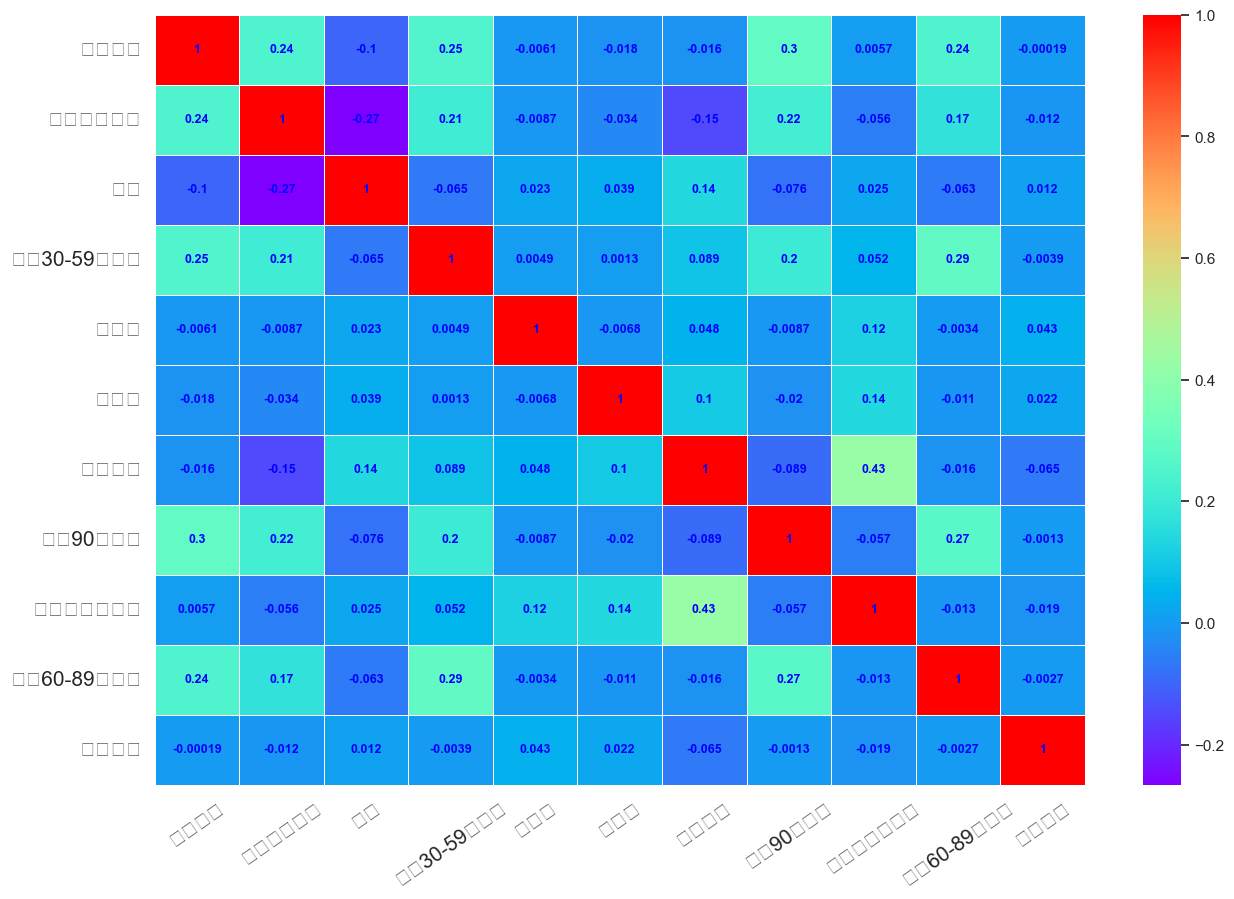

In [220]:
# 相关系数可视化
corr = data.iloc[:,1:].corr()#计算各变量的相关性系数
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()

* 没有任何两个特征之间的相关系数超过0.8，故无需进行筛选

In [222]:
# 原始值替换为WOE值
def replace_data(data_cut,data_woe):
    a=[]
    for item in data_cut.columns:
        a=[]
        for i in data_cut[item].unique():
            a.append(i)
            a.sort()
        for m in range(len(a)):
            data_cut[item].replace(a[m],data_woe[item].values[m],inplace=True)

    return data_cut

In [223]:
# 原始值替换为WOE值
data_temp = replace_data(data_cut, data_woe)

In [224]:
# 剔除IV值小于0.02的特征
data_temp = data_temp[data_iv[data_iv > 0.02].index]

In [225]:
data_temp['好坏客户'] = data['好坏客户']

In [226]:
data_temp.head()

,月收入,可用额度比值,年龄,逾期30-59天笔数,信贷数量,逾期90天笔数,逾期60-89天笔数,家属数量,好坏客户
0,0.308809,-1.049033,-0.209682,-1.715659,0.104298,0.345690,0.245409,-0.151491,1.0
1,-0.299227,-1.049033,-0.430950,0.476536,0.013534,0.345690,0.245409,-0.151491,0.0
2,-0.299227,-1.049033,-0.430950,-0.909510,-0.337587,-2.154748,0.245409,0.140356,0.0
3,-0.299227,0.253106,-0.430950,0.476536,0.111603,0.345690,0.245409,0.140356,0.0
4,0.308809,-1.049033,-0.209682,-0.909510,0.104298,0.345690,0.245409,0.140356,0.0


# 六、按特征分段进行探索性分析

In [227]:
# 拼接各个特征的data_cut，方便后续计算IV值
data_cut = pd.concat([
                      woe_cut(data.iloc[:,2:], 4)[['月收入','可用额度比值', '年龄']], 
                      cut1,cut2,cut3,cut4,cut5,cut6,cut7
                     ]
                     , axis=1)

In [228]:
data_cut['好坏客户'] = data['好坏客户']

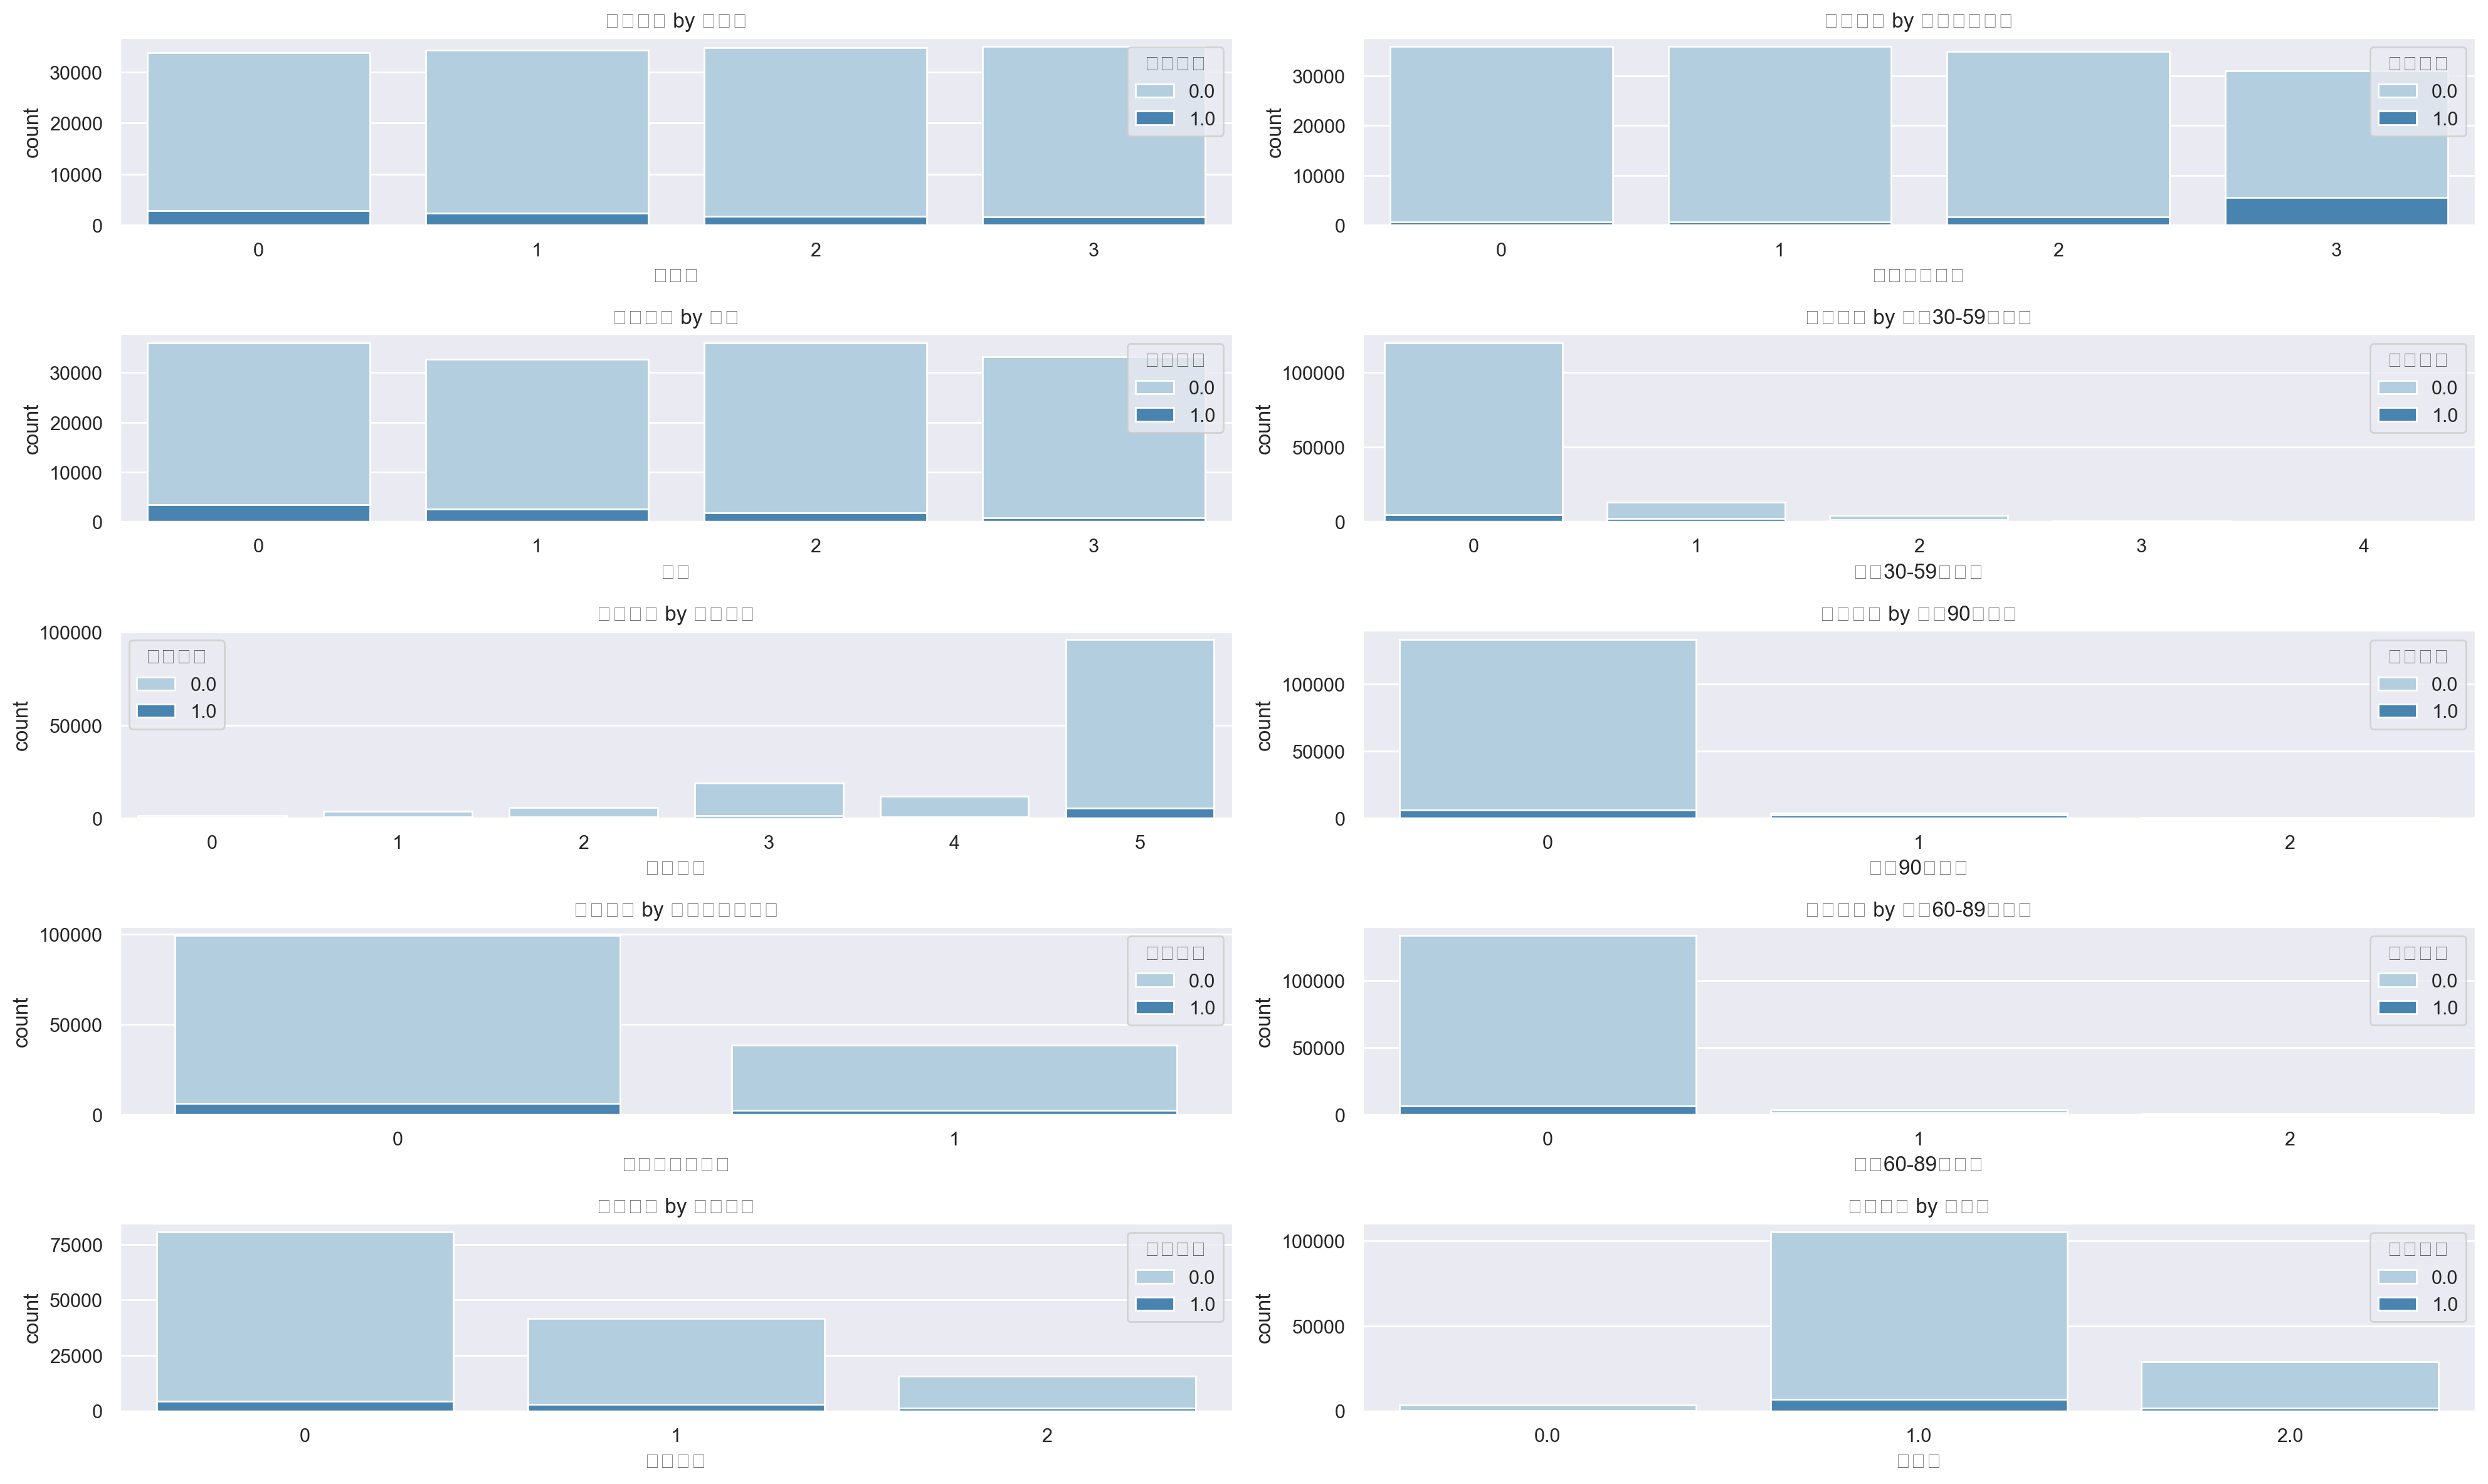

In [229]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(20,12), dpi=200)

cols = ['月收入', '可用额度比值', '年龄', '逾期30-59天笔数', '信贷数量', '逾期90天笔数', '固定资产贷款量',
       '逾期60-89天笔数', '家属数量', '负债率']
# 采用原始数据集进行绘制
for i, item in enumerate(cols):
    plt.subplot(5,2,(i+1)) #子图标记从1开始
    ax=sns.countplot(x=item,hue="好坏客户",data=data_cut,palette="Blues", dodge=False)
#     plt.xlabel(item)
#     plt.subplots_adjust(bottom=0.5)
    plt.title("好坏客户 by "+ item)
    plt.tight_layout()
#     plt.show()

# 七、逻辑回归建模

In [230]:
from sklearn import metrics
import scipy.optimize as op
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [231]:
# 划分训练集和测试集
# 由于数据集极度不均衡，故对好客户和坏客户分别进行划分

# 坏客户
Bad=data_temp[data_temp['好坏客户'] == 1]

# 普通用户
Good=data_temp[data_temp['好坏客户'] == 0]

# 坏客户训练集测试集划分
train_Bad, test_Bad = train_test_split(Bad, test_size=0.25, random_state=21)

# 好客户训练集测试集划分
train_Good, test_Good = train_test_split(Good, test_size=0.25, random_state=21)

In [232]:
# 训练集数据拼接
train = pd.concat([train_Bad, train_Good], axis=0)
X_train = train.drop(['好坏客户'], axis=1)
y_train = train['好坏客户']

# 测试集数据拼接
test = pd.concat([test_Bad, test_Good], axis=0)
X_test = test.drop(['好坏客户'], axis=1)
y_test = test['好坏客户']

In [233]:
X_train.shape

(109792, 8)

In [234]:
X_test.shape

(36598, 8)

In [235]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
def result_df(model, X_train, y_train, X_test, y_test, metrics=
              [accuracy_score, recall_score, precision_score, f1_score, roc_auc_score]):
    res_train = []
    res_test = []
    col_name = []
    for fun in metrics:
        res_train.append(fun(model.predict(X_train), y_train))
        res_test.append(fun(model.predict(X_test), y_test)) 
        col_name.append(fun.__name__) 
    idx_name = ['train_eval', 'test_eval']
    res = pd.DataFrame([res_train, res_test], columns=col_name, index=idx_name)
    return res

In [236]:
# 实例化逻辑回归模型
logistic_model = LogisticRegression(max_iter=int(1e8))

In [237]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=100000000)

In [238]:
# 查看逻辑回归模型结果
result_df(logistic_model, X_train, y_train, X_test, y_test)

,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
train_eval,0.942582,0.551540,0.143717,0.228019,0.750114
test_eval,0.942975,0.567718,0.141667,0.226751,0.758151


In [243]:
# 计算KS值
# TODO
fpr_train,tpr_train,threshold_train = roc_curve(y_train,logistic_model.predict_proba(X_train)[:, 1])
ks_train = max(abs(tpr_train-fpr_train))
ks_train

0.5280712590732624

# 八、实验分析  

### 用实验数据分析第二部分提出的几个假设

# TODO
可用额度比值越大，客户为坏客户的风险越大 ?
信贷数量越大，客户为坏客户的风险越高 ?
年龄越小，客户为坏客户的风险越高 ?

通过第四部分的数据可视化探索，可以发现
相比好客户，坏客户的可用额度比值较高，
相比好客户，坏客户的年龄要更小一点
相比好客户，坏客户的信贷数量反而稍少